In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from expconfig.synthetic import create_paths

In [2]:
ic_in, ic_out = create_paths(source_spacing=30.0)

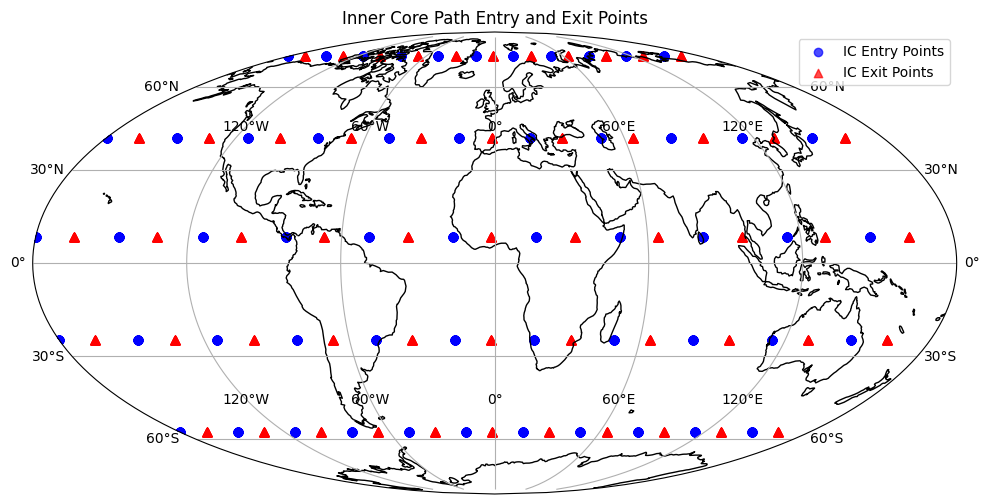

In [3]:
def plot_ic_inout(ic_in: np.ndarray, ic_out: np.ndarray) -> None:
    """Plot entry and exit points of paths through the inner core on a world map.

    Parameters
    ----------
    ic_in : ndarray, shape (num_paths, 3)
        Entry points of paths into the inner core (longitude (deg), latitude (deg), radius (km)).
    ic_out : ndarray, shape (num_paths, 3)
        Exit points of paths from the inner core (longitude (deg), latitude (deg), radius (km)).
    """
    fig, ax = plt.subplots(
        1, 1, subplot_kw={"projection": ccrs.Mollweide()}, figsize=(12, 6)
    )
    ax.coastlines()
    ax.set_global()
    ax.gridlines(draw_labels=True)

    ax.scatter(
        ic_in[:, 0],
        ic_in[:, 1],
        color="blue",
        marker="o",
        label="IC Entry Points",
        transform=ccrs.PlateCarree(),
        alpha=0.7,
    )
    ax.scatter(
        ic_out[:, 0],
        ic_out[:, 1],
        color="red",
        marker="^",
        label="IC Exit Points",
        transform=ccrs.PlateCarree(),
        alpha=0.7,
    )

    plt.title("Inner Core Path Entry and Exit Points")
    plt.legend()
    plt.show()


plot_ic_inout(ic_in, ic_out)

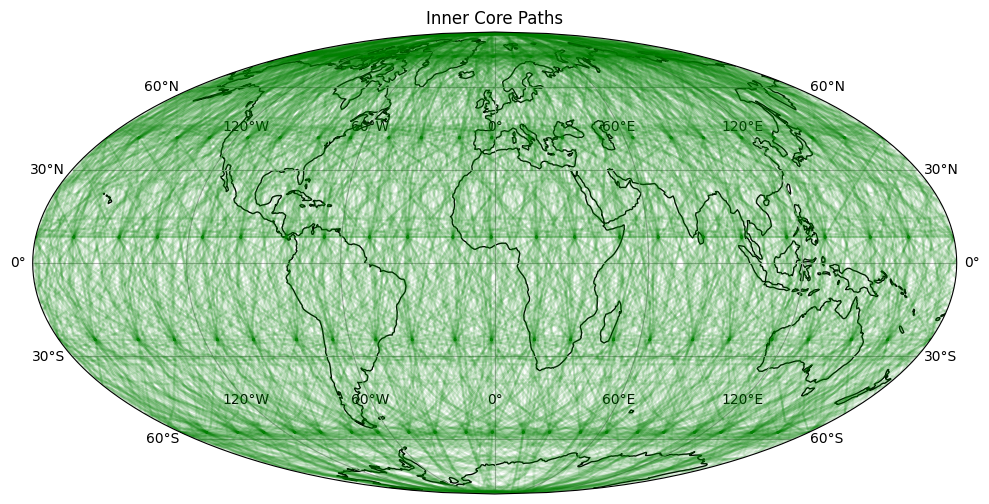

In [4]:
def plot_ic_paths(ic_in: np.ndarray, ic_out: np.ndarray, num_paths: int = 1000) -> None:
    """Plot paths through the inner core on a world map.

    Parameters
    ----------
    ic_in : ndarray, shape (num_paths, 3)
        Entry points of paths into the inner core (longitude (deg), latitude (deg), radius (km)).
    ic_out : ndarray, shape (num_paths, 3)
        Exit points of paths from the inner core (longitude (deg), latitude (deg), radius (km)).
    num_paths : int, optional
        Number of paths to plot (default is 1000).
    """
    fig, ax = plt.subplots(
        1, 1, subplot_kw={"projection": ccrs.Mollweide()}, figsize=(12, 6)
    )
    ax.coastlines()
    ax.set_global()
    ax.gridlines(draw_labels=True)

    total_paths = ic_in.shape[0]
    step = max(1, total_paths // num_paths)

    for i in range(0, total_paths, step):
        ax.plot(
            [ic_in[i, 0], ic_out[i, 0]],
            [ic_in[i, 1], ic_out[i, 1]],
            color="green",
            alpha=0.1,
            transform=ccrs.Geodetic(),  # straight lines through the inner core, not great circles
        )

    plt.title("Inner Core Paths")
    plt.show()


plot_ic_paths(ic_in, ic_out, num_paths=ic_in.shape[0])